## This coding script is created for testing project algorithms
    
----------
## CONTENTS

-     [1. Create artificial data for test](#1)  
     
-     [2. Specify File names and features of analysis](#2)       
                    
-     [3. Foci Analysis](#3) 
    -            [3.1 MRC analysis](#3.1) 
    -            [3.2 MRC - Statistical analysis ](#3.2) 
    -            [3.3 EPE analysis](#3.2) 

-     [4. Visualization](#4) 
    -            [4.1 Visualization of skull stripping results](#4.1) 
    -            [4.2 Visualization of MRC analysis](#4.2) 
    -            [4.3 Visualization of Suspected Epileptic Foci ](#4.2)


In [1]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib as mpl

In [2]:
from ipynb.fs.full.Whole_project_classes import *
from ipynb.fs.full.visualization_helper_functions import *

<a name='1'></a>
# 1.  Create data for test

In [3]:
## prepare folders
create_new_folder('test_data')
output_root_folder = 'test_output'
create_new_folder(output_root_folder)

folder_list = ['t2_cor', 't2_tra']
sequence_dict = {'t2' : folder_list}

## create nifti data
create_test_data('test_data', 'stripped_data', folder_list)
EF_coordinates = create_test_data('test_data', 'ordered_data', folder_list)

## create excel file
MRI_info_excel_name = 'MRI_informations.xlsx'
situations = ['controls', 'patients']
create_excel_file(os.path.join(output_root_folder, MRI_info_excel_name), situations, folder_list)

<a name='2'></a>
# 2. Specify File names and features of analysis

In [4]:
## path info
stripped_data_folder = 'test_data/stripped_data'
original_data_folder = 'test_data/ordered_data'
MRC_output_folder = 'MRC_results'   ## this folder will be created within code as: output_root_folder/MRC_output_folder
MRC_stat_results_folder = 'MRC_stat_results'
EPE_stat_results_folder = 'EPE_stat_results'
feature_storage_folder = 'features'
EPE_csv_file_name = 'results.csv'
coll_EPE_csv_file_name = 'coll_results.csv'
p_csv_path, auc_csv_path  = 'p_values.csv', 'auc_values.csv'
meaningful_stat_csv_path, selected_features_path = 'meaningful_stats.csv', 'selected_features.csv'
coll_p_csv_path, coll_auc_csv_path = 'p_values_collective.csv', 'auc_values_collective.csv'
coll_meaningful_stat_csv_path, coll_selected_features_path = 'meaningful_collective_stats.csv', 'selected_features_coll.csv'
all_selected_EPE_stat_file_name = 'EPE_selected_features.csv'

## analysis limits
AUC_limit = 0.7
p_limit = 0.01
minimum_step , maximum_step = 1, 5
minimum_power, maximum_power = 1, 5
primary_rate_calculation = 'all'
secondary_rate_calculation = 'all'
calculate_all_powers = True
calculate_all_steps = True
take_p_values_in_csv, take_auc_values_in_csv, take_meaningful_values_csv = True, True, True
EPE_analysis_proccess_follow = 'none'
EPE_specificity_min = 0.90
EPE_sensitivity_min = 0.60
EPE_analysis_per_case_research_value_limit = 20
processor_numbers_for_paralel_calculation = 4
processor_numbers_for_paralel_calculation_coll = 2

<a name='3'></a>
# 3. Foci Analysis

<a name='3.1'></a>
## 3.1. MRC analysis

In [5]:
MRC_Analysis = MRC_Analysis( stripped_data_folder,
    original_data_folder,
    output_root_folder,
    MRC_output_folder,
    MRC_analysis_features={'min_step': minimum_step, 'max_step': maximum_step, 
                            'min_power' :minimum_power, 'max_power' : maximum_power,
                           'ROI_shapes': ['circle', 'square'],
                           'primary_rate': primary_rate_calculation, 
                           'secondary_rate': secondary_rate_calculation, 
                           'calculate_all_powers': calculate_all_powers, 
                           'calculate_all_steps': calculate_all_steps})

MRC_Analysis.make_MRC_analysis()

0it [00:00, ?it/s]


<a name='3.2'></a>
## 3.2 MRC - Statistical analysis 

In [6]:
MRC_stat = MRC_statistical_analysis(stripped_data_folder = stripped_data_folder, 
                 output_root_folder = output_root_folder, 
                 MRC_output_folder = os.path.join(output_root_folder, MRC_output_folder),
                 stat_results_folder = MRC_stat_results_folder, 
              stat_limits = {'auc_limit' : AUC_limit, 'p_limit' : p_limit})

## make analysis per MRI type
MRC_stat.make_analysis(take_p_csv = take_p_values_in_csv, 
                       take_auc_csv = take_auc_values_in_csv, 
                       take_meaningful_csv = take_meaningful_values_csv)

MRC_stat.save_results(p_csv_path = p_csv_path, auc_csv_path = auc_csv_path, 
                      meaningful_stat_csv_path = meaningful_stat_csv_path,
                      selected_features_path = selected_features_path,
                     sort_columns = True)

## make analysis per sequence (collective analysis)
MRC_stat.make_collective_analysis(take_p_csv = take_p_values_in_csv, 
                                  take_auc_csv = take_auc_values_in_csv, 
                                  take_meaningful_csv = take_meaningful_values_csv,
                                 sequences = sequence_dict,
                                case_info_excel_file = os.path.join(output_root_folder, MRI_info_excel_name))

MRC_stat.save_results(p_csv_path = coll_p_csv_path, auc_csv_path = coll_auc_csv_path, 
                      meaningful_stat_csv_path = coll_meaningful_stat_csv_path,
                      selected_features_path = coll_selected_features_path,
                         sort_columns = True)

100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]


<a name='3.3'></a>
## 3.3 EPE analysis 

In [7]:
epe = EPE_Analysis__(stripped_data_folder = stripped_data_folder,
            original_data_folder = original_data_folder,
            output_root_folder = output_root_folder,
            stat_results = EPE_stat_results_folder, 
            feature_out = feature_storage_folder)

epe.make_analysis(features_csv_path = os.path.join(MRC_stat_results_folder, selected_features_path), 
                      EPE_stat_file_name = EPE_csv_file_name,
                      specificity_min = EPE_specificity_min, sensitivity_min = EPE_sensitivity_min, 
                      per_case_value_limit = EPE_analysis_per_case_research_value_limit,
                      record_features = True,
                      follow_proccess = EPE_analysis_proccess_follow,
                     processor_number = processor_numbers_for_paralel_calculation)

epe.make_collective_analysis(features_collective_csv_path = os.path.join(MRC_stat_results_folder, coll_selected_features_path), 
                      coll_EPE_stat_file_name = coll_EPE_csv_file_name,
                      sequences = sequence_dict,
                      case_info_excel_file = os.path.join(output_root_folder, MRI_info_excel_name),
                      specificity_min = EPE_specificity_min, sensitivity_min = EPE_sensitivity_min, 
                      per_case_value_limit = EPE_analysis_per_case_research_value_limit,
                      record_features = True,
                      follow_proccess = EPE_analysis_proccess_follow,
                     processor_number = processor_numbers_for_paralel_calculation_coll)

In [8]:
all_results_df = pd.DataFrame()

## get MRI type reuslts
for key in folder_list:
    result_output_path =  os.path.join(output_root_folder, EPE_stat_results_folder, key + '-' + EPE_csv_file_name)
    df = pd.read_csv(result_output_path)
    all_results_df = pd.concat([df, all_results_df])
    
## get sequence (collective) results
for key in sequence_dict.keys():
    result_output_path =  os.path.join(output_root_folder, EPE_stat_results_folder, key + '-' + coll_EPE_csv_file_name)        
    df = pd.read_csv(result_output_path)
    df.rename(columns = {'sequence':'MRI_type'}, inplace = True)
    all_results_df = pd.concat([df, all_results_df])
        
## save data
all_results_df.sort_values(by = 'specificity(EPE)', ascending=False, inplace=True)
result_output_path = os.path.join(output_root_folder, EPE_stat_results_folder, all_selected_EPE_stat_file_name)
all_results_df.to_csv(result_output_path, index =False) 

 <a name='3.4'></a>
## 3.4 Test Estimated foci coordinates by EPE analysis

In [9]:
## get estimated foci coordinates
features_df = pd.read_csv(result_output_path)
columns = ['situation', 'coordinates', 'case']
estimated_coord = pd.DataFrame(columns = columns)
features_df = pd.read_csv(result_output_path)
columns = ['situation', 'coordinates', 'case']
estimated_coord = pd.DataFrame(columns = columns)
for feature_ind in features_df.index:
    feature_vals = features_df.iloc[feature_ind, :6].values
    feature_pkl_path = take_pkl_file_path(feature_vals, os.path.join(output_root_folder,feature_storage_folder))
    feature_df = pd.read_pickle(feature_pkl_path)
    threshold = features_df['threshold'].iloc[feature_ind]
    step = features_df['step'].iloc[feature_ind]
    ROI_shape = features_df['shape'].iloc[feature_ind]
    foci_df = feature_df[columns][feature_df['value'] > threshold]
    if len(estimated_coord) == 0:
        estimated_coord = foci_df.copy()
    else:
        estimated_coord = pd.merge(foci_df, estimated_coord, on = columns, how = 'inner')

In [10]:
## test the data
test_EF_Coordinates(estimated_coord['coordinates'].values, EF_coordinates)

 The test is passed. Algorithm is working properly! 


<a name='4'></a>
# 4. Visualization

<a name='4.1'></a>
## 4.1 Visualization of skull stripping results

In [11]:
case_file = 'case2.nii.gz'
case_folder = 't2_cor'
situation = 'patients'

## specify original case file path
original_case_file = os.path.join(original_data_folder, situation, case_folder, case_file)
original_case_data = nib.load(original_case_file)
original_array = original_case_data.get_fdata() 

## specify stripped case file path
stripped_case_file = os.path.join(stripped_data_folder, situation, case_folder, case_file)
stripped_case_data = nib.load(stripped_case_file)
stripped_array = stripped_case_data.get_fdata() 

In [12]:
## by changing slice index you can set correct view
explore_3D_array_with_mask(arr = original_array, mask = stripped_array, slice_ind = 0, 
                           axis='on', show_colorbar=True)

interactive(children=(IntSlider(value=2, description='SLICE', max=4), Output()), _dom_classes=('widget-interac…

<a name='4.2'></a>
## 4.2 Visualization of MRC analysis

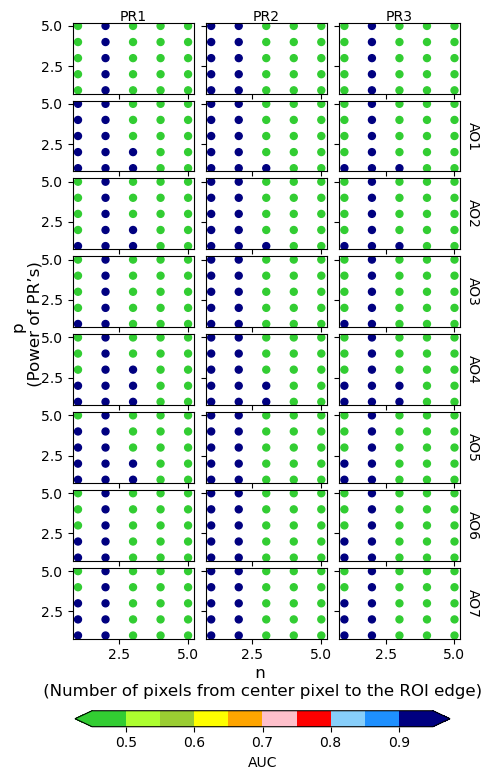

In [13]:
# specify MRI data features for creating graph
stat_file_path = os.path.join(output_root_folder, MRC_stat_results_folder, coll_auc_csv_path)
stat_df = pd.read_csv(stat_file_path)
MRI_column_name = 'sequence'
MRI_type = list(sequence_dict.keys())[0]
shape = 'circle'

# create figure
figure_MRC_AUC_(stat_file_path, MRI_column_name, MRI_type,  shape)

<a name='4.3'></a>
## 4.3 Visualization of Suspected Epileptic Foci 

In [14]:
subfolder = folder_list[0]
feature_output_folder = os.path.join(output_root_folder, feature_storage_folder)
features_csv_path =  os.path.join(output_root_folder, EPE_stat_results_folder, all_selected_EPE_stat_file_name)
feature_ind = 1

In [ ]:
foci_image_path = create_folder(os.path.join(output_root_folder,'estimated_foci_images'))
efv = epileptic_focus_visualization(stripped_data_folder = stripped_data_folder,
                original_data_folder = original_data_folder,
                feature_output_folder = feature_output_folder,
                features_csv_path = features_csv_path,
                feature_ind = feature_ind)
efv.show_figure(save_figure = True,  folder_path = foci_image_path)